#### Importing the Libraries

In [1]:
import sklearn
from sklearn import svm
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns

### SVM - Linear Model

In [2]:
#load the data for Linear SVM
data1 = loadmat('Desktop\Miscellenous\machine-learning-ex6\ex6\ex6data1')

X1 shape is (51, 2)
y1 shape is (51,)


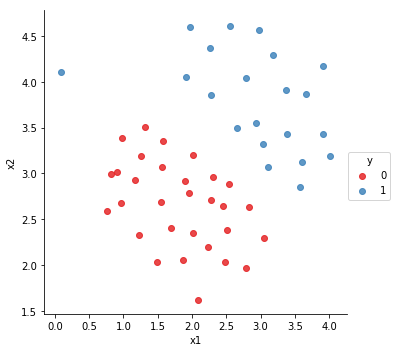

In [3]:
#visualize the data
X1 =data1['X']
y1 =data1['y'].ravel()
print('X1 shape is {}'.format(X1.shape))
print('y1 shape is {}'.format(y1.shape))
df1=pd.DataFrame(X1, columns=['x1','x2'])
df1['y']=y1
sns.lmplot(x='x1', y='x2', data=df1, fit_reg=False, hue='y',palette="Set1")
plt.show()

In [4]:
#Linear SVM with C=1.0
clf1 = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
clf1.fit(X1, y1)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [5]:
clf1.score(X1, y1)

0.98039215686274506

In [6]:
#Linear SVM with C=100
clf2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
clf2.fit(X1, y1)

LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [7]:
clf2.score(X1, y1)

1.0

In [8]:
decision_data1= clf1.decision_function(X1)
decision_data2= clf2.decision_function(X1)

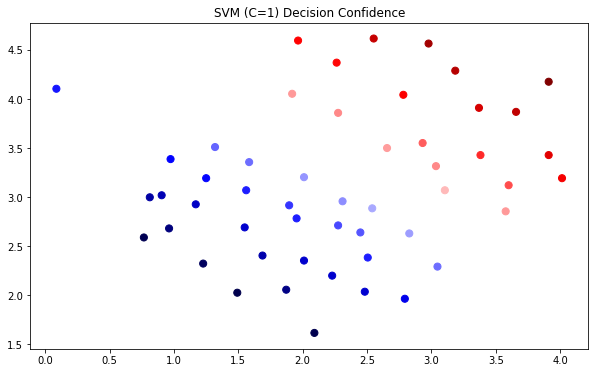

In [113]:
# Plot the Confidence interval with C=1.0
df = pd.DataFrame(X1, columns=['x1','x2'])
df['y'] = decision_data1
fig, ax = plt.subplots(figsize=(10,6))  
ax.scatter(df['x1'], df['x2'], s=50, c=df['y'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')  
plt.show()

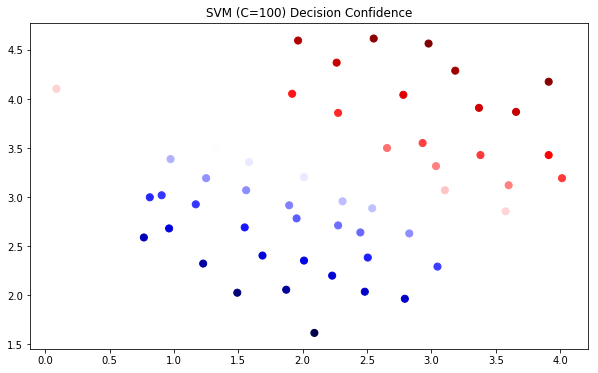

'We Can see the difference in faded color and larger margin in the Plot'

In [115]:
# Plot the Confidence interval with C=100
df = pd.DataFrame(X1, columns=['x1','x2'])
df['y'] = decision_data2
fig, ax = plt.subplots(figsize=(10,6))  
ax.scatter(df['x1'], df['x2'], s=50, c=df['y'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')  
plt.show()
'We Can see the difference in faded color and larger margin in the Plot'

### SVM - Non Linear Model

In [17]:
#load data2
data2 = loadmat('Desktop\Miscellenous\machine-learning-ex6\ex6\ex6data2')

X2 shape is (863, 2)
y2 shape is (863,)


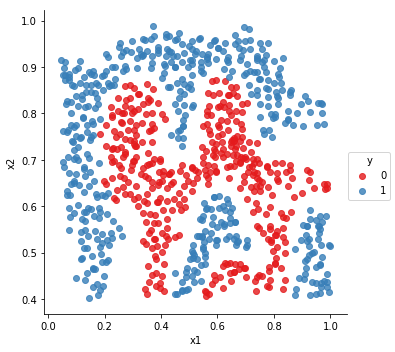

In [18]:
#visualize the data
X2 = data2['X']
y2 =data2['y'].ravel()
print('X2 shape is {}'.format(X2.shape))
print('y2 shape is {}'.format(y2.shape))
df1=pd.DataFrame(X2, columns=['x1','x2'])
df1['y']=y2
sns.lmplot(x='x1', y='x2', data=df1, fit_reg=False, hue='y',palette="Set1")
plt.show()

In [38]:
clf = svm.SVC(C=100, kernel ='rbf')
clf.fit(X2, y2)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
clf.score(X2, y2)

0.82387022016222478

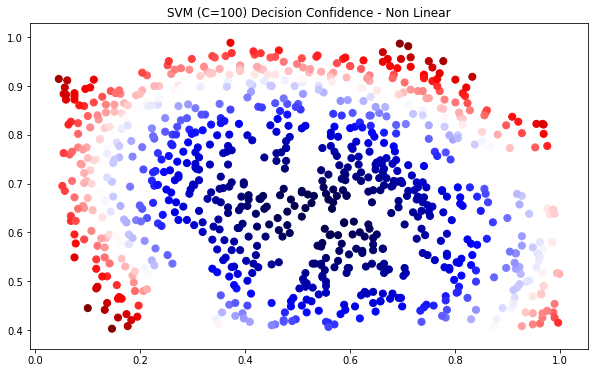

In [40]:
decision_data = clf.decision_function(X2)
df = pd.DataFrame(X2, columns=['x1','x2'])
df['y'] = decision_data
fig, ax = plt.subplots(figsize=(10,6))  
ax.scatter(df['x1'], df['x2'], s=50, c=df['y'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence - Non Linear')  
plt.show()

### Hyperparameter Tuning with Raw Data

In [61]:
#loading the raw data
data3 = loadmat('Desktop\Miscellenous\machine-learning-ex6\ex6\ex6data3')
X3 = data3['X']
X_val = data3['Xval']
y3 = data3['y'].ravel()
y_val = data3['yval'].ravel()
print('shape of X3 is {}'.format(X3.shape))
print('shape of X_val is {}'.format(x_val.shape))
print('shape of y3 is {}'.format(y3.shape))
print('shape of y_val is {}'.format(y_val.shape))

shape of X3 is (211, 2)
shape of X_val is (200, 2)
shape of y3 is (211,)
shape of y_val is (200,)


In [89]:
#Hyperparameter tuning with row data
from sklearn.model_selection import GridSearchCV
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
param_grid = {'C': C_values, 'gamma': gamma_values}
clf3 = svm.SVC()
clf3_cv = GridSearchCV(clf3, param_grid, cv=5)
clf3_cv.fit(X3, y3)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100], 'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [90]:
print('best_score is {}'.format(clf3_cv.best_score_))
print('best_parameter is {}'.format(clf3_cv.best_params_))

best_score is 0.919431279620853
best_parameter is {'C': 30, 'gamma': 3}


In [91]:
clf3_cv.score(x_val, y_val)

0.94999999999999996

### Training and Testing A Spam Filter model

In [95]:
#Training and Testing spam filter model
data_train = loadmat('Desktop\Miscellenous\machine-learning-ex6\ex6\spamTrain')
data_test = loadmat('Desktop\Miscellenous\machine-learning-ex6\ex6\spamTest')
X_train = data_train['X']
y_train = data_train['y'].ravel()
X_test = data_test['Xtest']
y_test = data_test['ytest'].ravel()

In [99]:
print('shape of X_train is {}'.format(X_train.shape))
print('shape of y_train is {}'.format(y_train.shape))
print('shape of X_test is {}'.format(X_test.shape))
print('shape of y_test is {}'.format(y_test.shape))

shape of X_train is (4000, 1899)
shape of y_train is (4000,)
shape of X_test is (1000, 1899)
shape of y_test is (1000,)


In [102]:
#Setting the model
svc = svm.SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [103]:
print('Model Accuracy is {0}%'.format(svc.score(X_test, y_test)*100))

Model Accuracy is 95.3%
